In [1]:
import os
import importlib.util
import math

import tensorflow as tf
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt 
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

from alad_mod.alad import ALAD
from mock_study.mock_data_generator import *



In [2]:
result_path = '/home/oliverkn/pro/results/mock/alad/test_01/'
config_file = result_path + 'config.py'
weights_file = result_path + 'model-1722000'

# loading config
spec = importlib.util.spec_from_file_location('config', config_file)
config = importlib.util.module_from_spec(spec)
spec.loader.exec_module(config)

# loading alad
tf.reset_default_graph()
ad = ALAD(config, tf.Session())
ad.load(weights_file)


W0714 10:50:33.070787 139715351541568 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0714 10:50:33.115806 139715351541568 deprecation_wrapper.py:119] From /home/oliverkn/cloud/eth/2019_FS/pro/pycharm/alad_mod/alad.py:28: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 10:50:33.118687 139715351541568 deprecation_wrapper.py:119] From /home/oliverkn/cloud/eth/2019_FS/pro/pycharm/alad_mod/alad.py:43: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0714 10:50:33.119557 139715351541568 deprecation.py:323] From /home/oliverkn/pro/results/mock/alad/test_01/config.py:73: dense 

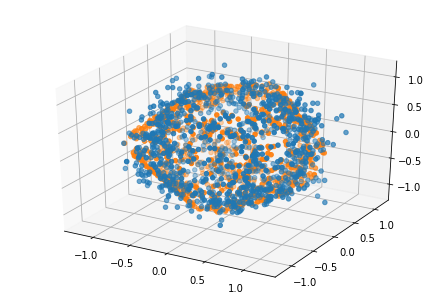

In [3]:
x, y = generate_mix(1000, error=0.1)

x_recon = ad.recon(x)

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(x[:, 0], x[:, 1], x[:, 2])
ax.scatter(x_recon[:, 0], x_recon[:, 1], x_recon[:, 2])

pyplot.show()